In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import math



In [ ]:
nodes = 100
graphs = {
    'ER': [nx.erdos_renyi_graph(nodes, 0.5)],
    'WS': [nx.watts_strogatz_graph(nodes, 6, 0.3)],
    'BA': [nx.barabasi_albert_graph(nodes, 3)]
}
for name, feature in graphs.items():
  graph = feature[0]
  feature.append(nx.algebraic_connectivity(graph))
  laplacian_matrix = nx.normalized_laplacian_matrix(graph)
  eigenvalues = np.linalg.eigvals(laplacian_matrix.toarray())
  delta_lambda = eigenvalues[len(eigenvalues) - 1] - eigenvalues[len(eigenvalues) - 2]
  feature.append(delta_lambda)  #spectural graph
  laplacian_eignvalues = nx.laplacian_spectrum(graph)
  feature.append(laplacian_eignvalues[1])
  feature.append(sum(abs(num) for num in eigenvalues))
  m = graph.number_of_edges()
  gamma = []
  for i in range(len(laplacian_eignvalues)):
    gamma.append(laplacian_eignvalues[i] - 2 * m / nodes)
  feature.append(sum(abs(num) for num in gamma))

  print(feature)
# print(type(a))
# print(nx.algebraic_connectivity(a))
# nx.draw(a)

[<networkx.classes.graph.Graph object at 0x7f4cdbe32f80>, 37.73273737913912, -0.030709543148406904, 37.732737379139124, 100.0000000000001, 631.3413295729891]
[<networkx.classes.graph.Graph object at 0x7f4cf8acd240>, 0.9470130801195457, -0.028582759146159153, 0.9470130801195529, 100.00000000000007, 228.4938849849801]
[<networkx.classes.graph.Graph object at 0x7f4cdbe339a0>, 1.4020801090038646, 0.0, 1.4020801090037995, 100.0000000000001, 371.29090529422126]


In [ ]:
def erdos_reyni_model_10_200(p):
    feature = []
    for n in range(10, 101):
        er = nx.erdos_renyi_graph(n, p)
        feature.append(graph_features(er, n))
    return feature

def watts_strogatz_model_10_200(k, p):
    feature = []
    for n in range(10, 101):
        ws = nx.watts_strogatz_graph(n, k, p)
        feature.append(graph_features(ws, n))
    return feature

def barabasi_albert_model_10_200(m):
    feature = []
    for n in range(10, 101):
        ba = nx.barabasi_albert_graph(n, m)
        feature.append(graph_features(ba, n))
    return feature

def watts_strogatz_model(n, k, p):
    ws = nx.watts_strogatz_graph(n, k, p)
    return graph_features(ws, n)


def barabasi_albert_model(n, m):
    ba = nx.barabasi_albert_graph(n, m)
    return graph_features(ba, n)


def graph_features(graph, n):
    feature = [nx.algebraic_connectivity(graph, method='lanczos')]

    laplacian_matrix = nx.normalized_laplacian_matrix(graph)
    eigenvalues = np.linalg.eigvals(laplacian_matrix.toarray())
    delta_lambda = eigenvalues[len(eigenvalues) - 1] - eigenvalues[len(eigenvalues) - 2]
    feature.append(delta_lambda)  # spectural graph

    sigma_e = 0
    for eValue in eigenvalues:
        sigma_e += math.exp(eValue)
    avg_lambda = math.log(math.floor(sigma_e / n))
    feature.append(avg_lambda)

    feature.append(sum(abs(num) for num in eigenvalues))

    m = graph.number_of_edges()
    laplacian_eignvalues = nx.laplacian_spectrum(graph)
    gamma = []
    for i in range(len(laplacian_eignvalues)):
        gamma.append(laplacian_eignvalues[i] - 2 * m / n)
    feature.append(sum(abs(num) for num in gamma))

    # print(feature)
    return feature


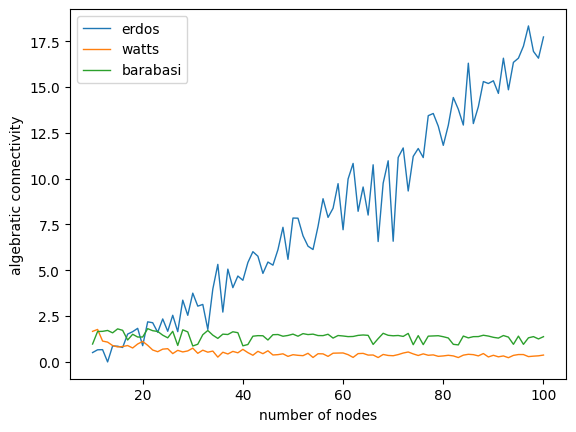

In [ ]:
a = erdos_reyni_model_10_200(0.30)
a = [x[0] for x in a]
b = watts_strogatz_model_10_200(4, 0.3)
b = [x[0] for x in b]
c = barabasi_albert_model_10_200(3)
c = [x[0] for x in c]

plt.plot(range(10, 101), a, label='erdos', linewidth=1)
plt.plot(range(10, 101), b, label='watts', linewidth=1)
plt.plot(range(10, 101), c, label='barabasi', linewidth=1)

plt.ylabel("algebratic connectivity")
plt.xlabel("number of nodes")
plt.legend()
plt.show()

[[0.5245339051675088, -0.05544680202967944, 1.0986122886681098, 9.999999999999993, 18.455357911879407], [0.3596824229115572, 0.4999999999999998, 1.0986122886681098, 10.999999999999996, 18.817843264553204], [0.24541236515480414, -4.440892098500626e-16, 1.0986122886681098, 12.000000000000007, 18.77214764757091], [1.5309471508242098, 0.08110264037259796, 1.0986122886681098, 13.000000000000002, 28.463829413301838], [0.6854274256897415, -0.03720399322296575, 1.0986122886681098, 14.000000000000002, 34.48935083717119], [0.746317715081381, 0.17640333501827377, 1.0986122886681098, 15.00000000000001, 28.785578990328677], [1.3356497759779151, 0.016936784772661806, 0.6931471805599453, 16.000000000000004, 39.720740273779484], [0.714919252676042, 0.06698851480405088, 1.0986122886681098, 17.0, 36.62176560098277], [0.7577350735097108, 0.08446326522527547, 1.0986122886681098, 17.999999999999986, 43.91387980428003], [2.6246738390725906, 0.008863602249645774, 0.6931471805599453, 19.00000000000001, 50.633

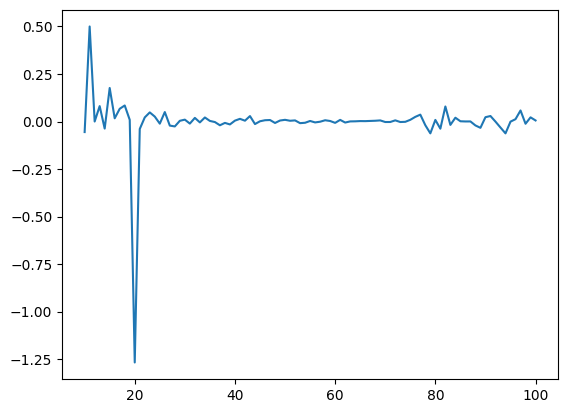

In [ ]:
b = [x[1] for x in a]
print(a)
print(b)
plt.plot(range(10, 101), b)

#Qeustion2

In [ ]:
def find_n2 (n1, d1):
  temp = n1 * d1
  q = []
  for i in range(2, int(temp / 2) + 1):
    if temp % i == 0:
      q.append(i)

  flag = False
  n2 = 0
  d2 = 0
  while flag == False:
    n2 = random.choice(q)
    if (n2 >= d1):
      flag = True
      d2 = int(temp / n2)
  return n2, d2

In [ ]:
d1 = random.randint(1, 10)
n1 = random.randint(10, 30)
n2, d2 = find_n2(n1, d1)
print(f'n1: {n1}')
print(f'n2: {n2}')
print(f'd1: {d1}')
print(f'd2: {d2}')
a = []
for i in range(1, n1 + 1):
  a += [i for x in range(d1)]

b = []
for i in range(n1 + 1, n1 + n2 + 1):
  b += [i for x in range(d2)]

print(a)
print(b)

n1: 16
n2: 8
d1: 1
d2: 2
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24]


[(12, 1), (22, 2), (16, 1), (24, 2), (1, 1), (19, 2), (2, 1), (10, 1), (11, 1), (18, 2), (8, 1), (23, 2), (14, 1), (21, 2), (5, 1), (17, 2), (3, 1), (9, 1), (13, 1), (20, 2), (4, 1), (15, 1), (7, 1), (6, 1)]


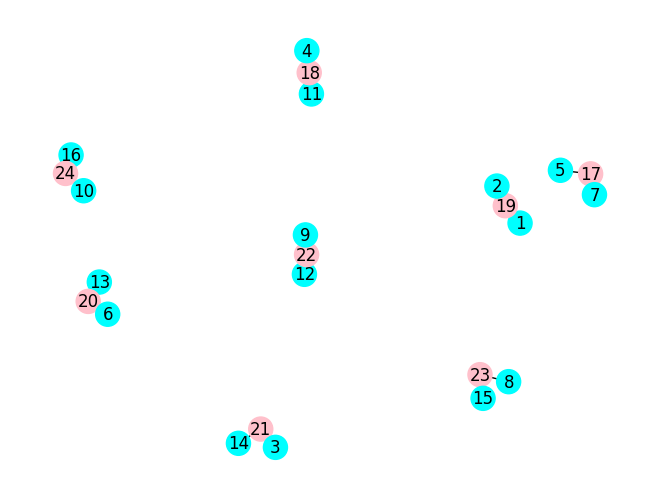

In [ ]:
nodes_added = []
RSRBG = nx.Graph()

while len(a) != 0:

  index_a = random.randint(0, len(a))
  index_b = random.randint(0, len(b))

  node_a = a[index_a - 1]
  node_b = b[index_b - 1]

  if node_a not in nodes_added:
    nodes_added.append(node_a)
    RSRBG.add_node(node_a)

  if node_b not in nodes_added:
    nodes_added.append(node_b)
    RSRBG.add_node(node_b)

  if not RSRBG.has_edge(node_a, node_b):
    RSRBG.add_edge(node_a, node_b)
    a.pop(index_a - 1)
    b.pop(index_b - 1)

  # print(edges_added)

color_map = []
for node in RSRBG:
    if node < n1 + 1:
        color_map.append('cyan')
    else:
        color_map.append('pink')

print(list(RSRBG.degree))
nx.draw(RSRBG, node_color=color_map, with_labels=True)

#Q5

In [ ]:
n = 100
y = 10

probabilities = np.array([0] * n)
sum_of_degrees = 0
for _ in range(1000):
  # Generate a random SF graph with 100 nodes using the Barabási-Albert model
  graph = nx.barabasi_albert_graph(n, y)
  # Calculate the degree distribution
  degree_distribution = list(dict(graph.degree()).values())
  # Normalize the degree distribution to obtain the probability of a node having a specific degree
  probabilities += np.array(degree_distribution)
  sum_of_degrees += sum(degree_distribution)
# plt.plot(probabilities / sum_of_degrees)
x = [i for i in range(len(probabilities))]

plt.plot(x, probabilities / sum_of_degrees)
plt.show()

#Q6

In [ ]:
def algebraic_connectivity(G):
    # compute the Laplacian matrix
    L = nx.laplacian_matrix(G).todense()

    # find the eigenvalues of the Laplacian matrix
    eigenvalues = np.linalg.eigvals(L)

    # sort the eigenvalues in increasing order
    eigenvalues.sort()

    # the algebraic connectivity is the second smallest eigenvalue
    return np.real(eigenvalues[1])

In [ ]:
# Generate the δ-regular graph
graph_reg = nx.random_regular_graph(6, 500)
graph_rsrbg = RSRBG(4, 12, 512)

# Set the number of tests to perform
n_tests = np.arange(100, 1001, 100)

# Set the number of repetitions for each test
n_reps = 100

# Initialize the probability of inconsistency for each test
prob_inconsistency_reg = np.zeros(len(n_tests))
prob_inconsistency_rsrbg = np.zeros(len(n_tests))

reg_graph_alg_con = []
rsrbg_alg_con = []

# Perform the tests
for i, n_remove in enumerate(n_tests):
    for j in range(n_reps):
        # Shuffle the edges
        edges_reg = list(graph_reg.edges())
        edges_rsrbg = list(graph_rsrbg.edges())

        random.shuffle(edges_reg)
        random.shuffle(edges_rsrbg)

        # Remove edges one by one to make the graph disjoint
        for k in range(n_remove):
            graph_reg.remove_edge(*edges_reg[k])

        for k in range(n_remove):
            graph_rsrbg.remove_edge(*edges_rsrbg[k])

        # Check if the graph is disjoint
        if not nx.is_connected(graph_reg):
            prob_inconsistency_reg[i] += 1

        if not nx.is_connected(graph_rsrbg):
            prob_inconsistency_rsrbg[i] += 1

        reg_graph_alg_con.append(algebraic_connectivity(graph_reg))
        rsrbg_alg_con.append(algebraic_connectivity(graph_rsrbg))

        # Restore the original graph
        graph_reg.add_edges_from(edges_reg[:n_remove])
        graph_rsrbg.add_edges_from(edges_rsrbg[:n_remove])

    # Calculate the probability of inconsistency for the current test
    prob_inconsistency_reg[i] /= n_reps
    prob_inconsistency_rsrbg[i] /= n_reps

plt.plot(n_tests, prob_inconsistency_reg)
plt.plot(n_tests, prob_inconsistency_rsrbg)
plt.show()

#Q7

In [ ]:
def find_girth(G):
  # Find all cycles in the graph
  cycles = nx.cycle_basis(G)

  # Find the minimum length of the cycles
  girth = min([len(cycle) for cycle in cycles])
  return girth

In [ ]:
# Generating different graphs with same size to test girth
n = 20
d1 = 3
d2 = 2
p = 0.2
ER_p = 0.5
SF_m = 3
small_world_p = 0.3
small_world_nn = 4

ws_graph = nx.watts_strogatz_graph(n, small_world_nn, small_world_p)
er_graph = nx.erdos_renyi_graph(n, ER_p)
sf_graph = nx.barabasi_albert_graph(n, SF_m)
rsrb_graph = RSRBG(d1, d2, n)
# rsr_graph = RSRG(p, d1, d2, n)

fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(10, 15))

# Draw the first graph in the first subplot
nx.draw(ws_graph, ax=ax1, with_labels=True, node_color=['#E92DC3'], edge_color=['grey'])
ax1.set_title('WS Graph')

# Draw the second graph in the second subplot
nx.draw(er_graph, ax=ax2, with_labels=True, node_color=['#07BEB8'], edge_color=['grey'])
ax2.set_title('ER Graph')

# Draw the third graph in the third subplot
nx.draw(sf_graph, ax=ax3, with_labels=True, node_color=['#8F3985'], edge_color=['grey'])
ax3.set_title('SF Graph')

# Draw the fourth graph in the fourth subplot
nx.draw(rsrb_graph, ax=ax4, with_labels=True,  node_color=['#008B8B'], edge_color=['grey'])
ax4.set_title('RSRB Graph')

# Draw the fifth graph in the fifth subplot
# nx.draw(rsr_graph, ax=ax5, with_labels=True, node_color=['#7B68EE'], edge_color=['grey'])
# ax5.set_title('RSR Graph')

# Remove the last empty subplot
fig.delaxes(_)

# Adjust the layout of the subplots
fig.tight_layout()